# Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.callbacks import ReduceLROnPlateau
from IPython.display import Audio

# Suppress warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Dataset

## Dataset Paths

In [2]:
# Paths for data.
Ravdess = "E:\\Code Alpha\\Machine Learning\\Emotion Recognition from Speech\\Datasets\\RAVDESS Emotional speech audio\\"
Crema = "E:\\Code Alpha\\Machine Learning\\Emotion Recognition from Speech\\Datasets\\CREMA-D\\"
Tess = "E:\\Code Alpha\\Machine Learning\\Emotion Recognition from Speech\\Datasets\\Toronto emotional speech set (TESS)\\"
Savee = "E:\\Code Alpha\\Machine Learning\\Emotion Recognition from Speech\\Datasets\\Surrey Audio-Visual Expressed Emotion (SAVEE)\\"

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

## Loading RAVDESS Dataset

In [4]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\RAVDESS Emotional speech audio\Actor_01/03-01-01-01-01-01-01.wav
1,neutral,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\RAVDESS Emotional speech audio\Actor_01/03-01-01-01-01-02-01.wav
2,neutral,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\RAVDESS Emotional speech audio\Actor_01/03-01-01-01-02-01-01.wav
3,neutral,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\RAVDESS Emotional speech audio\Actor_01/03-01-01-01-02-02-01.wav
4,calm,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\RAVDESS Emotional speech audio\Actor_01/03-01-02-01-01-01-01.wav


## Loading CREMA-D Dataset

In [5]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()


,Emotions,Path
0,angry,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\CREMA-D\1001_DFA_ANG_XX.wav
1,disgust,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\CREMA-D\1001_DFA_DIS_XX.wav
2,fear,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\CREMA-D\1001_DFA_FEA_XX.wav
3,happy,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\CREMA-D\1001_DFA_HAP_XX.wav
4,neutral,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\CREMA-D\1001_DFA_NEU_XX.wav


## Loading TESS Dataset

In [6]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()


,Emotions,Path
0,angry,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\Toronto emotional speech set (TESS)\OAF_angry/OAF_back_angry.wav
1,angry,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\Toronto emotional speech set (TESS)\OAF_angry/OAF_bar_angry.wav
2,angry,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\Toronto emotional speech set (TESS)\OAF_angry/OAF_base_angry.wav
3,angry,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\Toronto emotional speech set (TESS)\OAF_angry/OAF_bath_angry.wav
4,angry,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\Toronto emotional speech set (TESS)\OAF_angry/OAF_bean_angry.wav


## Loading SAVEE Dataset 

In [7]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()


,Emotions,Path
0,angry,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\Surrey Audio-Visual Expressed Emotion (SAVEE)\DC_a01.wav
1,angry,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\Surrey Audio-Visual Expressed Emotion (SAVEE)\DC_a02.wav
2,angry,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\Surrey Audio-Visual Expressed Emotion (SAVEE)\DC_a03.wav
3,angry,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\Surrey Audio-Visual Expressed Emotion (SAVEE)\DC_a04.wav
4,angry,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\Surrey Audio-Visual Expressed Emotion (SAVEE)\DC_a05.wav


## Merging different datasets

In [8]:
# creating Dataframe using all the 4 dataframes we created so far.

data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\RAVDESS Emotional speech audio\Actor_01/03-01-01-01-01-01-01.wav
1,neutral,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\RAVDESS Emotional speech audio\Actor_01/03-01-01-01-01-02-01.wav
2,neutral,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\RAVDESS Emotional speech audio\Actor_01/03-01-01-01-02-01-01.wav
3,neutral,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\RAVDESS Emotional speech audio\Actor_01/03-01-01-01-02-02-01.wav
4,calm,E:\Code Alpha\Machine Learning\Emotion Recognition from Speech\Datasets\RAVDESS Emotional speech audio\Actor_01/03-01-02-01-01-01-01.wav


# Data Exploration (EDA)

In [9]:
unique_values = data_path['Emotions'].unique()
print(unique_values)

['neutral' 'calm' 'happy' 'sad' 'angry' 'fear' 'disgust' 'surprise']


In [10]:
unique_values_count = data_path['Emotions'].value_counts()
print(unique_values_count)

Emotions
happy       1923
sad         1923
angry       1923
fear        1923
disgust     1923
neutral     1703
surprise     652
calm         192
Name: count, dtype: int64


# Data Visualization

### Displaying Count

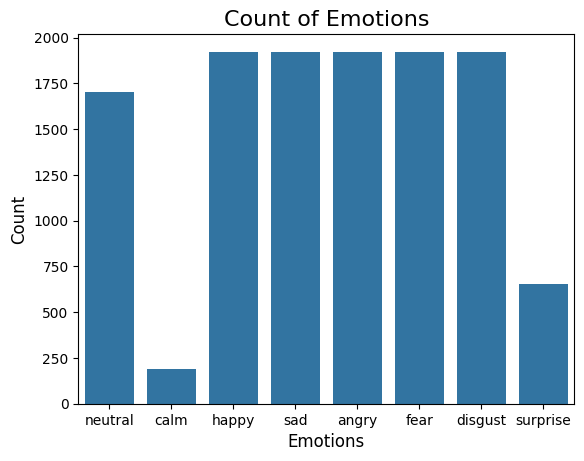

In [11]:
plt.title('Count of Emotions', size=16)

sns.countplot(x='Emotions', data=data_path)

plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)

plt.show()

### Creating Waveplot and Spectrogram

In [12]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

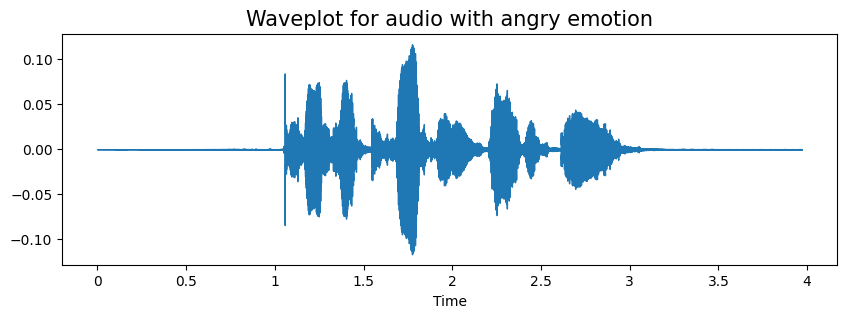

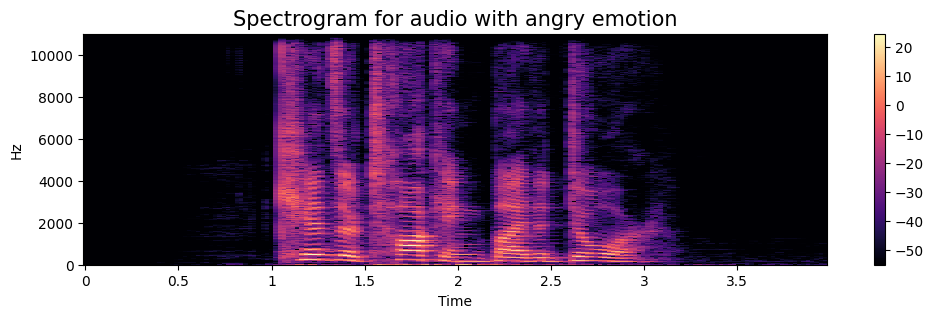

In [13]:
emotion='angry'

path = np.array(data_path.Path[data_path.Emotions==emotion])[89]
data, sampling_rate = librosa.load(path)

create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

Audio(path)

# Data Augmentation

In [14]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)



In [15]:
# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

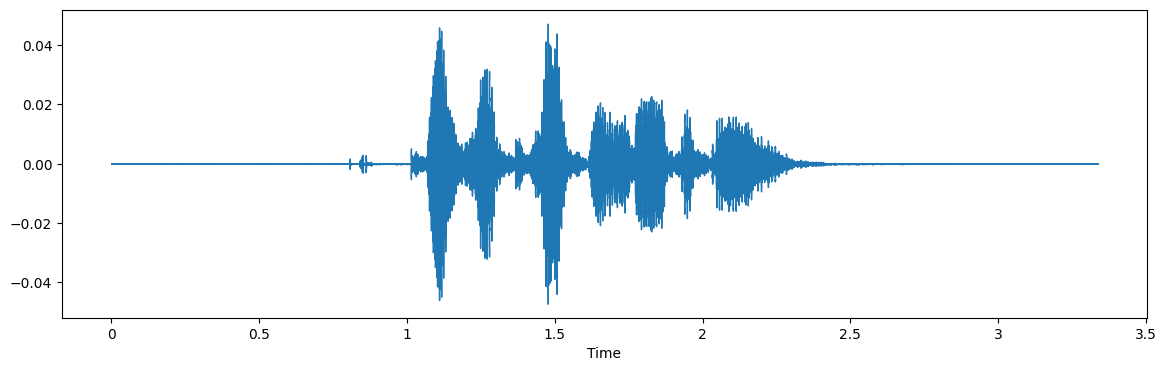

In [16]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

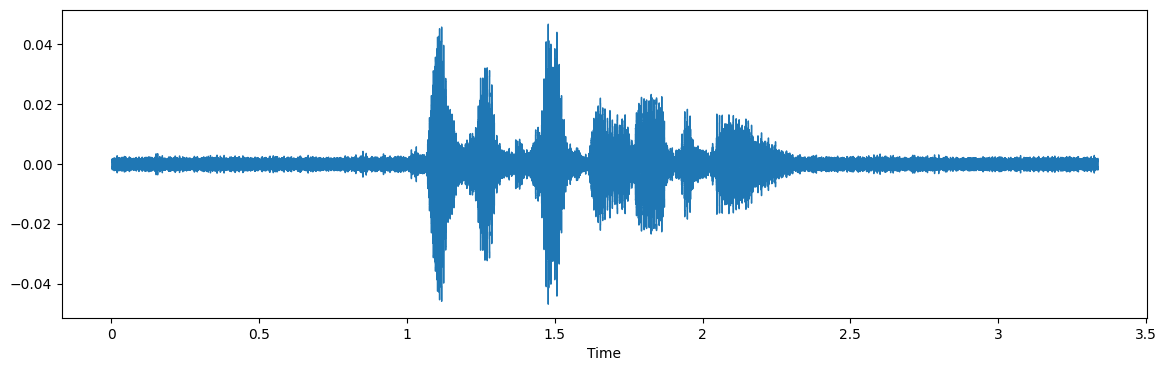

In [17]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

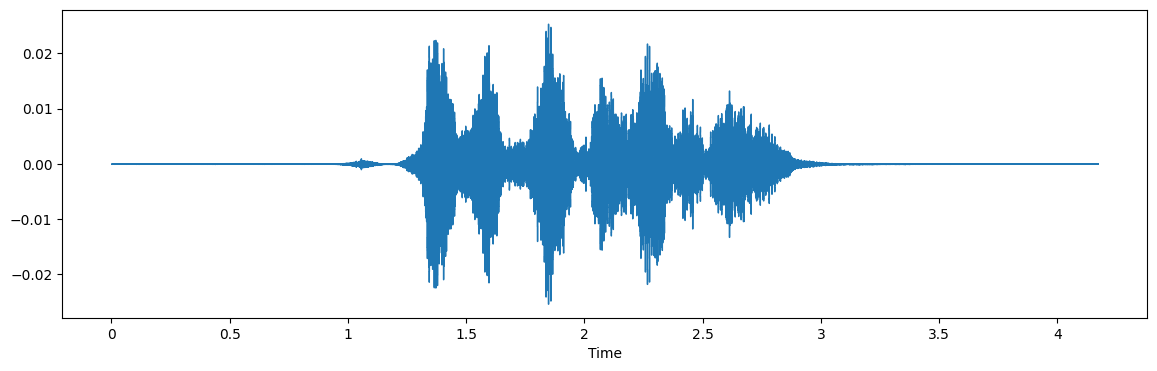

In [18]:
x = stretch(data, rate=0.8)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

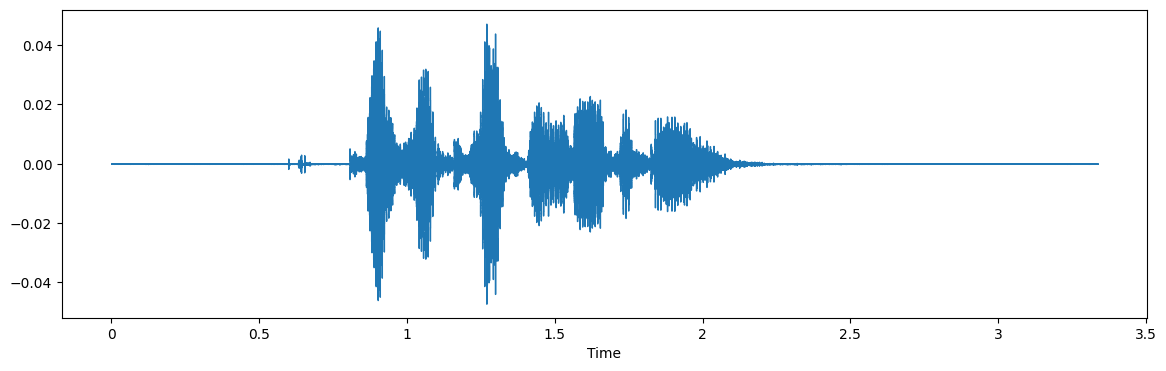

In [19]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

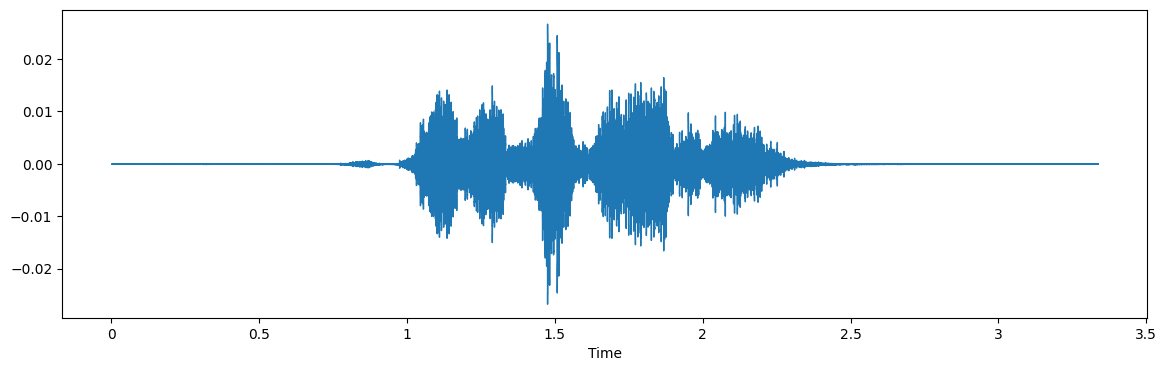

In [20]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# Features Extraction

In [21]:
def extract_features(data, sample_rate):
    # Zero Crossing Rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    
    return np.hstack([zcr, chroma_stft, mfcc, rms, mel])

def get_features(path):
    # Load audio data
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # Extract features without augmentation
    features = extract_features(data, sample_rate)
    
    # Extract features with noise
    noise_data = noise(data)  # Define your noise function
    features_noise = extract_features(noise_data, sample_rate)
    
    # Extract features with stretching and pitching
    stretched_data = stretch(data)  # Define your stretch function
    pitch_data = pitch(stretched_data, sample_rate)  # Define your pitch function
    features_stretch_pitch = extract_features(pitch_data, sample_rate)
    
    # Stack vertically
    all_features = np.vstack([features, features_noise, features_stretch_pitch])
    
    return all_features


## Separating input features and labels

In [22]:
X, Y = [], []

for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

## Saving features to CSV file

In [23]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)

In [24]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

### OneHotEncoding Labels

In [25]:
# Using OneHotEncoder for our multi-class labels
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

# Train Test Split

In [26]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

## Input Feature Scaling

In [27]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [28]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

# Model Building

In [29]:
model=Sequential()

model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.1))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 512)          3072      
                                                                 
 max_pooling1d (MaxPooling1  (None, 81, 512)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           655616    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 41, 256)           0         
 g1D)                                                            
                                                                 
 dropout (Dropout)           (None, 41, 256)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           1

## Model Fitting

In [30]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)

history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])


Epoch 1/50
428/428 [==============================] - 110s 253ms/step - loss: 1.7119 - accuracy: 0.3164 - val_loss: 1.5225 - val_accuracy: 0.3999 - lr: 0.0010
Epoch 2/50
428/428 [==============================] - 104s 244ms/step - loss: 1.4761 - accuracy: 0.4086 - val_loss: 1.3367 - val_accuracy: 0.4609 - lr: 0.0010
Epoch 3/50
428/428 [==============================] - 105s 246ms/step - loss: 1.3785 - accuracy: 0.4473 - val_loss: 1.2838 - val_accuracy: 0.4836 - lr: 0.0010
Epoch 4/50
428/428 [==============================] - 103s 240ms/step - loss: 1.3208 - accuracy: 0.4704 - val_loss: 1.2635 - val_accuracy: 0.4912 - lr: 0.0010
Epoch 5/50
428/428 [==============================] - 104s 242ms/step - loss: 1.2800 - accuracy: 0.4878 - val_loss: 1.2190 - val_accuracy: 0.5077 - lr: 0.0010
Epoch 6/50
428/428 [==============================] - 102s 239ms/step - loss: 1.2574 - accuracy: 0.4961 - val_loss: 1.1890 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 7/50
428/428 [==========================

# Model Evaluation

In [31]:
print("Test Data Accuracy: ", model.evaluate(x_test,y_test)[1]*100 , "%")


286/286 [==============================] - 17s 60ms/step - loss: 1.0242 - accuracy: 0.6061
Test Data Accuracy:  60.61170697212219 %


In [32]:
epochs = [i for i in range(50)]

train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

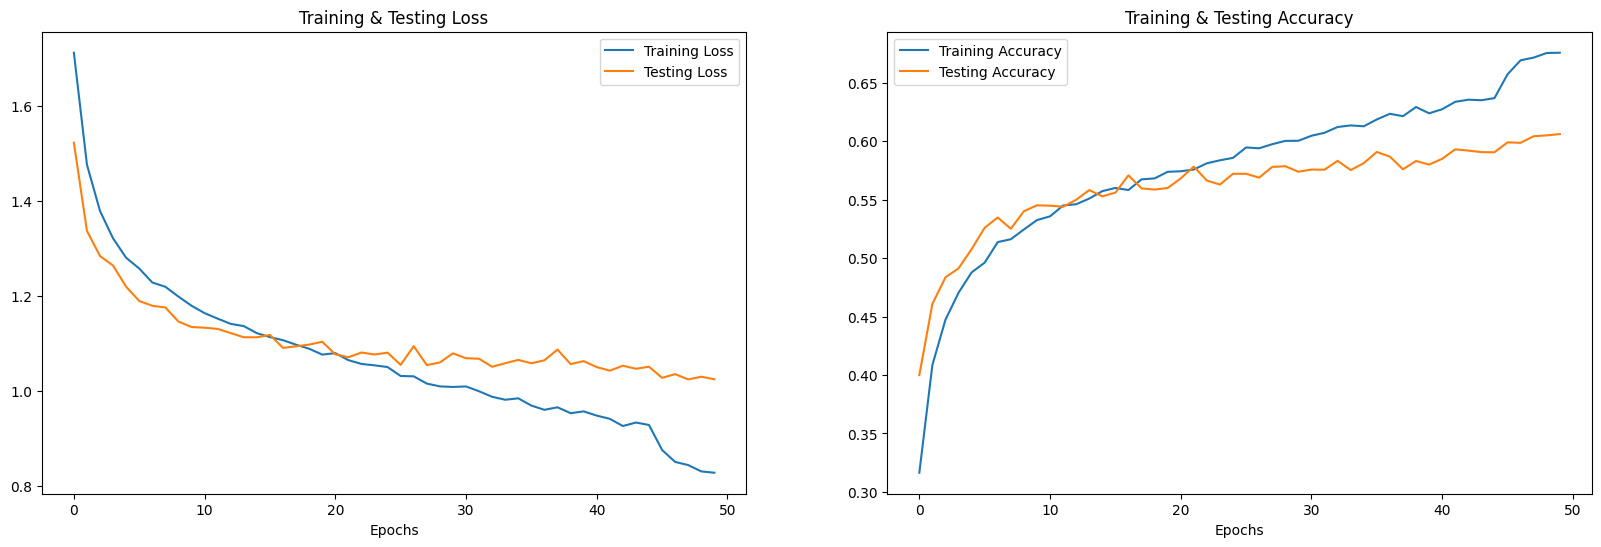

In [33]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,6)

ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')

ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

##########################################################
ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')

ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# Model Saving

In [34]:
import pickle
pickle.dump(model,open("model.pkl",'wb'))

In [35]:
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [36]:
# predicting on test data.
pred_test = loaded_model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

286/286 [==============================] - 18s 60ms/step


In [37]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,sad,disgust
1,disgust,disgust
2,angry,angry
3,disgust,disgust
4,sad,fear
5,disgust,fear
6,happy,happy
7,happy,happy
8,disgust,sad
9,neutral,sad


In [38]:
cm = confusion_matrix(y_test, y_pred)

labels = [i for i in encoder.categories_]
pd.DataFrame(cm , index = labels , columns = labels)

,angry,calm,disgust,fear,happy,neutral,sad,surprise
angry,988,2,112,66,210,29,17,14
calm,0,108,2,1,0,6,20,0
disgust,89,4,704,50,171,180,252,18
fear,72,1,65,687,180,74,318,27
happy,132,6,152,155,832,101,66,18
neutral,4,17,141,47,97,752,252,0
sad,1,32,66,61,33,155,1044,8
surprise,2,0,18,14,29,0,6,414


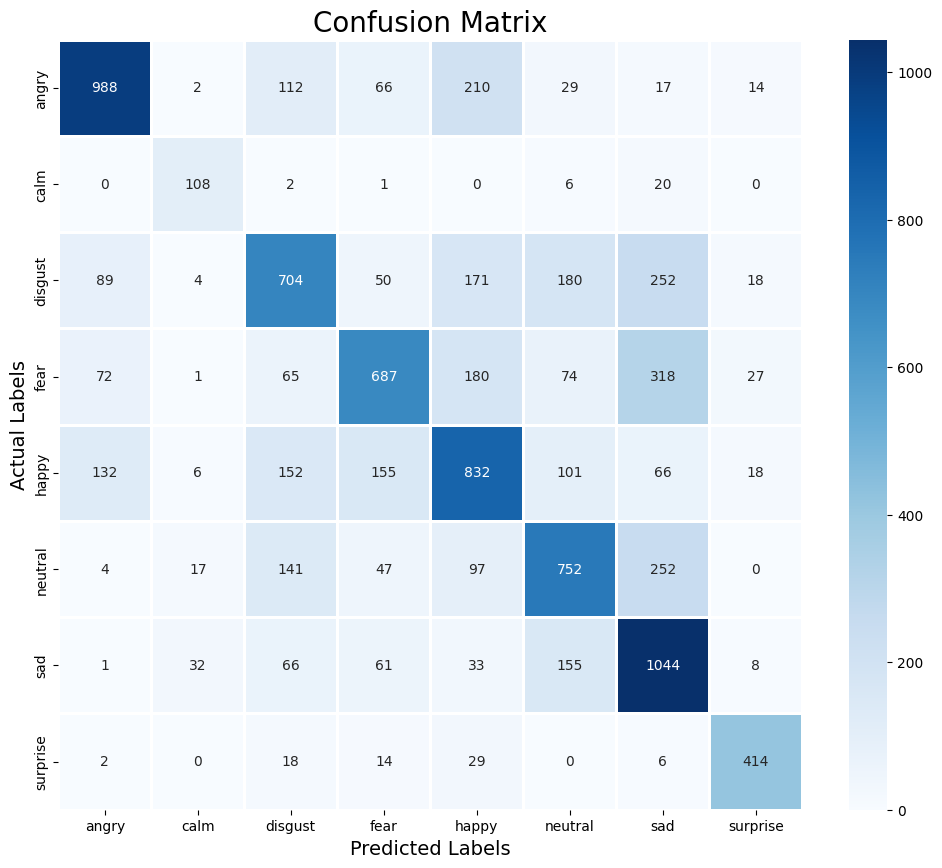

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
labels = [i for i in encoder.categories_]
cm = pd.DataFrame(cm , index = labels , columns = labels)

sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)

plt.show()

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.77      0.69      0.72      1438
        calm       0.64      0.79      0.70       137
     disgust       0.56      0.48      0.52      1468
        fear       0.64      0.48      0.55      1424
       happy       0.54      0.57      0.55      1462
     neutral       0.58      0.57      0.58      1310
         sad       0.53      0.75      0.62      1400
    surprise       0.83      0.86      0.84       483

    accuracy                           0.61      9122
   macro avg       0.63      0.65      0.64      9122
weighted avg       0.61      0.61      0.60      9122

